<a href="https://colab.research.google.com/github/gabrielcgo/PROJETOBLUESUB/blob/main/notebooks/playground/COVID_correlacao_Filmes2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [186]:
covid = pd.read_csv('/content/covid_region.csv')
movies = pd.read_csv('/content/movies_2018_2023.csv')

#  Modelando o dataset COVID

In [4]:
covid.head()

,WHO Region,Date,Confirmed,Deaths,Recovered,Active
0,Africa,2020-01-22,0,0,0,0
1,Africa,2020-01-23,0,0,0,0
2,Africa,2020-01-24,0,0,0,0
3,Africa,2020-01-25,0,0,0,0
4,Africa,2020-01-26,0,0,0,0


In [5]:
covid['Date'] = pd.to_datetime(covid['Date'])
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   WHO Region  1128 non-null   object        
 1   Date        1128 non-null   datetime64[ns]
 2   Confirmed   1128 non-null   int64         
 3   Deaths      1128 non-null   int64         
 4   Recovered   1128 non-null   int64         
 5   Active      1128 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 53.0+ KB


In [6]:
covid2 = covid

In [7]:
covid2['Date'] = covid2['Date'].map(lambda x: 100*x.year + x.month)

In [8]:
covid2.head()

,WHO Region,Date,Confirmed,Deaths,Recovered,Active
0,Africa,202001,0,0,0,0
1,Africa,202001,0,0,0,0
2,Africa,202001,0,0,0,0
3,Africa,202001,0,0,0,0
4,Africa,202001,0,0,0,0


#  Modelando o dataset Filmes

In [187]:
movies.head()

,Title,Rating,Year,Month,Runtime,Genre,Filming_location,Budget,Income,Country_of_origin
0,Avatar: The Way of Water,8.0,2022,12,192,"Action, Adventure, Fantasy",New Zealand,"$350,000,000","$681,081,686",United States
1,Guillermo del Toro's Pinocchio,7.8,2022,12,117,"Animation, Drama, Family",USA,"$35,000,000","$71,614","United States, Mexico, France"
2,Bullet Train,7.3,2022,8,127,"Action, Comedy, Thriller",Japan,"$85,900,000","$239,268,602","Japan, United States"
3,Amsterdam,6.1,2022,10,134,"Comedy, Drama, History",USA,"$80,000,000","$31,245,810","United States, Japan"
4,Violent Night,6.9,2022,12,112,"Action, Comedy, Crime",Canada,"$20,000,000","$59,595,460","United States, Canada"


In [188]:
movies['Year'] = movies['Year'].astype(str)
movies['Month'] = movies['Month'].astype(str)

In [189]:
movies['Date'] = movies['Year'] + "-" + movies['Month']

In [190]:
movies2 = movies.drop(columns=['Year', 'Month'])

movies2['Date'] = pd.to_datetime(movies2['Date'])

movies2['Date'] = movies2['Date'].map(lambda x: 100*x.year + x.month)

In [210]:
movies2.head(30)

,Title,Rating,Runtime,Genre,Filming_location,Budget,Income,Country_of_origin,Date
0,Avatar: The Way of Water,8.0,192,"Action, Adventure, Fantasy",New Zealand,"$350,000,000","$681,081,686",United States,202212
1,Guillermo del Toro's Pinocchio,7.8,117,"Animation, Drama, Family",USA,"$35,000,000","$71,614","United States, Mexico, France",202212
2,Bullet Train,7.3,127,"Action, Comedy, Thriller",Japan,"$85,900,000","$239,268,602","Japan, United States",202208
3,Amsterdam,6.1,134,"Comedy, Drama, History",USA,"$80,000,000","$31,245,810","United States, Japan",202210
4,Violent Night,6.9,112,"Action, Comedy, Crime",Canada,"$20,000,000","$59,595,460","United States, Canada",202212
5,The Fabelmans,7.8,151,Drama,USA,"$40,000,000","$9,500,361",United States,202211
6,The Menu,7.5,107,"Comedy, Horror, Thriller",USA,"$35,000,000","$65,878,071",United States,202211
7,Babylon,7.7,188,"Comedy, Drama, History",USA,"$78,000,000","$1,470",United States,202212
8,X,6.6,105,"Horror, Mystery, Thriller",New Zealand,"$1,000,000","$14,779,858","United States, Canada",202203
9,Bones and All,7.0,131,"Drama, Horror, Romance",USA,"$16,000,000","$14,134,907","Italy, United States",202211


#   Correlação COVID x FILMES

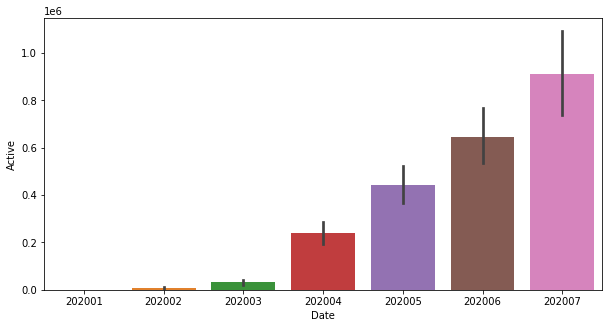

In [192]:
plt.figure(figsize=(10,5))
sns.barplot(data = covid2, x = 'Date', y = 'Active')

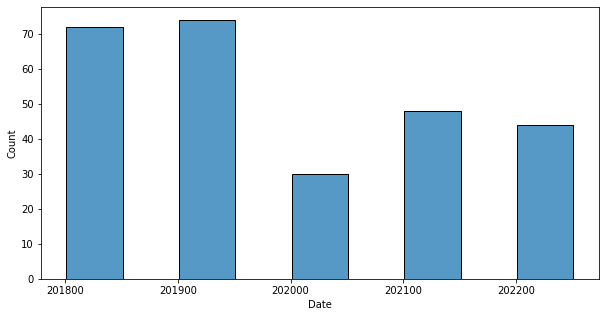

In [193]:
plt.figure(figsize=(10,5))
sns.histplot(x = 'Date', data = movies2, stat = 'count', binwidth=50)

#   Correlação específica

In [194]:
movies3 = movies2[(movies2['Date'] >= 202000) & (movies2['Date'] <= 202012)]

In [195]:
movies3['Income'] = movies3['Income'].apply(lambda x:(x.replace("$","").replace(",","")))

movies3['Income'] = movies3['Income'].astype(float)

movies3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 92 to 121
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              30 non-null     object 
 1   Rating             30 non-null     float64
 2   Runtime            30 non-null     int64  
 3   Genre              30 non-null     object 
 4   Filming_location   30 non-null     object 
 5   Budget             30 non-null     object 
 6   Income             30 non-null     float64
 7   Country_of_origin  30 non-null     object 
 8   Date               30 non-null     int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.3+ KB


<ipython-input-195-e1a7604fa622>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies3['Income'] = movies3['Income'].apply(lambda x:(x.replace("$","").replace(",","")))
<ipython-input-195-e1a7604fa622>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies3['Income'] = movies3['Income'].astype(float)


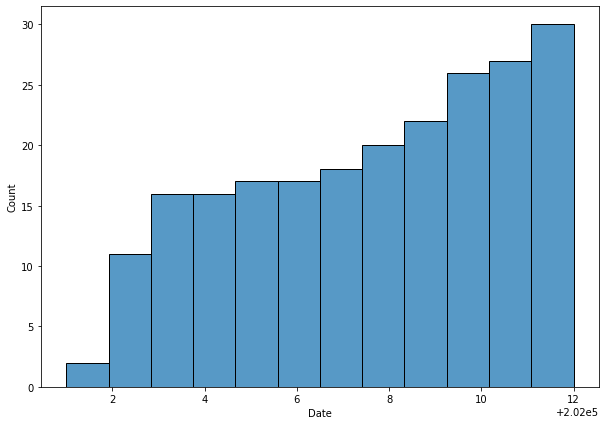

In [196]:
plt.figure(figsize=(10,7))
sns.histplot(x = 'Date', data = movies3, stat = 'count', bins = 12, cumulative = True)

In [236]:
movies4 = movies3.groupby(['Date']).sum().reset_index(drop=False)

movies4.head(12)

,Date,Rating,Runtime,Income
0,202001,12.3,219,467388172.0
1,202002,60.4,978,910902110.0
2,202003,33.1,525,220509993.0
3,202005,7.5,116,2000541.0
4,202007,5.7,88,4311042.0
5,202008,11.3,184,93501059.0
6,202009,13.0,265,435259729.0
7,202010,26.7,417,53950340.0
8,202011,6.3,102,18073433.0
9,202012,17.0,373,264047965.0


In [237]:
movies4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     10 non-null     int64  
 1   Rating   10 non-null     float64
 2   Runtime  10 non-null     int64  
 3   Income   10 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 448.0 bytes


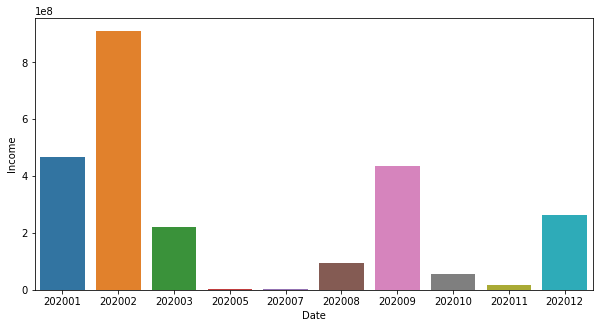

In [243]:
plt.figure(figsize=(10,5))
sns.barplot(y = 'Income', x = 'Date', data = movies4)